In [1]:
%cd drive/MyDrive/fusemachines_project/

/content/drive/MyDrive/fusemachines_project


In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.5 MB/s eta 0:00:00


Required Libraries

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler


Dataset Import

In [4]:
# Set the maximum number of columns to be displayed to None to show all columns
pd.set_option('display.max_columns', None)

In [5]:
# Load dataset into a pandas dataframe
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

Data Description

In [6]:
df.head(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,NaN,E Hanthorn Rd,R,Lima,Allen,OH,45806,US,US/Eastern,KAOH,2016-02-08 13:53:00,39.0,31.8,70.0,29.59,10.0,WNW,11.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,NaN,Outerbelt W,R,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 15:12:00,32.0,28.7,100.0,29.59,0.5,West,3.5,0.05,Snow,False,False,False,False,Fal

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


# Exploratory Data Analysis (EDA)

**Number of Accidents per State**

Initially, we will be creating map of each state of the US with a color based on the number of accidents present in the dataset for that state.

In [10]:
import plotly.io as pio

pio.renderers.default = 'colab'

In [11]:
import plotly.express as px

In [12]:
state_wise_data = df['State'].value_counts().reset_index()

In [13]:
state_wise_data.columns = ['state', 'no_of_accidents']

In [14]:
state_wise_data

,state,no_of_accidents
0,CA,795868
1,FL,401388
2,TX,149037
3,OR,126341
4,VA,113535
5,NY,108049
6,PA,99975
7,MN,97185
8,NC,91362
9,SC,89216


In [15]:
fig = px.choropleth(state_wise_data, locations=state_wise_data['state'],
                    color=state_wise_data['no_of_accidents'], locationmode="USA-states", title='State and its number of accidents')

In [16]:
fig.show()

Top 10 state with most accidents

In [17]:
x = state_wise_data['state']

In [18]:
x = x[:10].values

In [19]:
x

array(['CA', 'FL', 'TX', 'OR', 'VA', 'NY', 'PA', 'MN', 'NC', 'SC'],
      dtype=object)

In [20]:
y = state_wise_data['no_of_accidents']

In [21]:
y = y[:10].values

In [22]:
y

array([795868, 401388, 149037, 126341, 113535, 108049,  99975,  97185,
        91362,  89216])

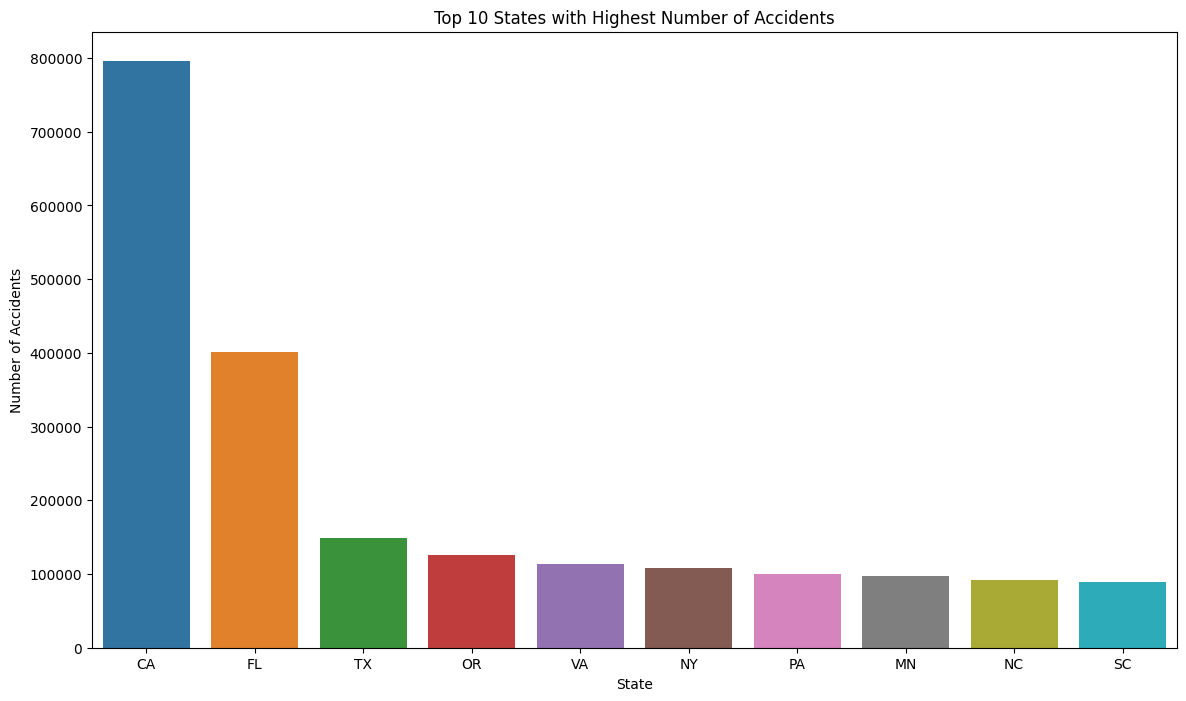

In [23]:
plt.figure(figsize=(14,8))
sns.barplot(x=x, y=y)
# add plot and axis labels
plt.title('Top 10 States with Highest Number of Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# display the plot
plt.show()

Based on the information presented in the barplot above, it is evident that California has the highest number of accidents among all states, with Florida and Texas following closely behind.

Most Frequent Road Features

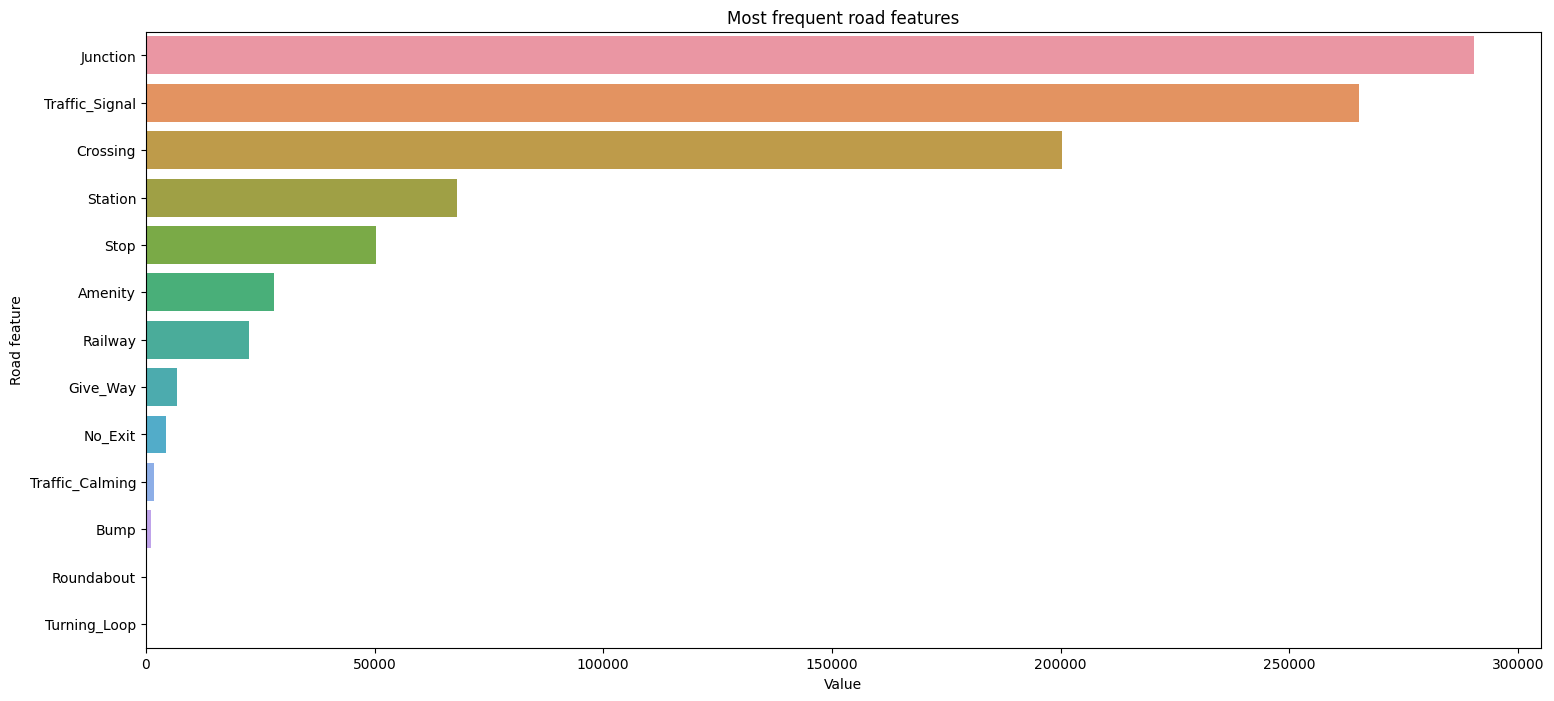

In [24]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
data = df[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(x=data.values, y=data.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

According to the diagram, it is evident that the majority of the accidents take place in close proximity to junctions, with traffic signals following closely behind in terms of frequency. The third most common location for accidents is at crossings, and the fourth is at stations.

# Distance of Road affected by Accidents based on Severity level

In [25]:
Severity_distance = df.groupby("Severity").mean()['Distance(mi)'].sort_values(ascending=False)

<ipython-input-25-770c443a667f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



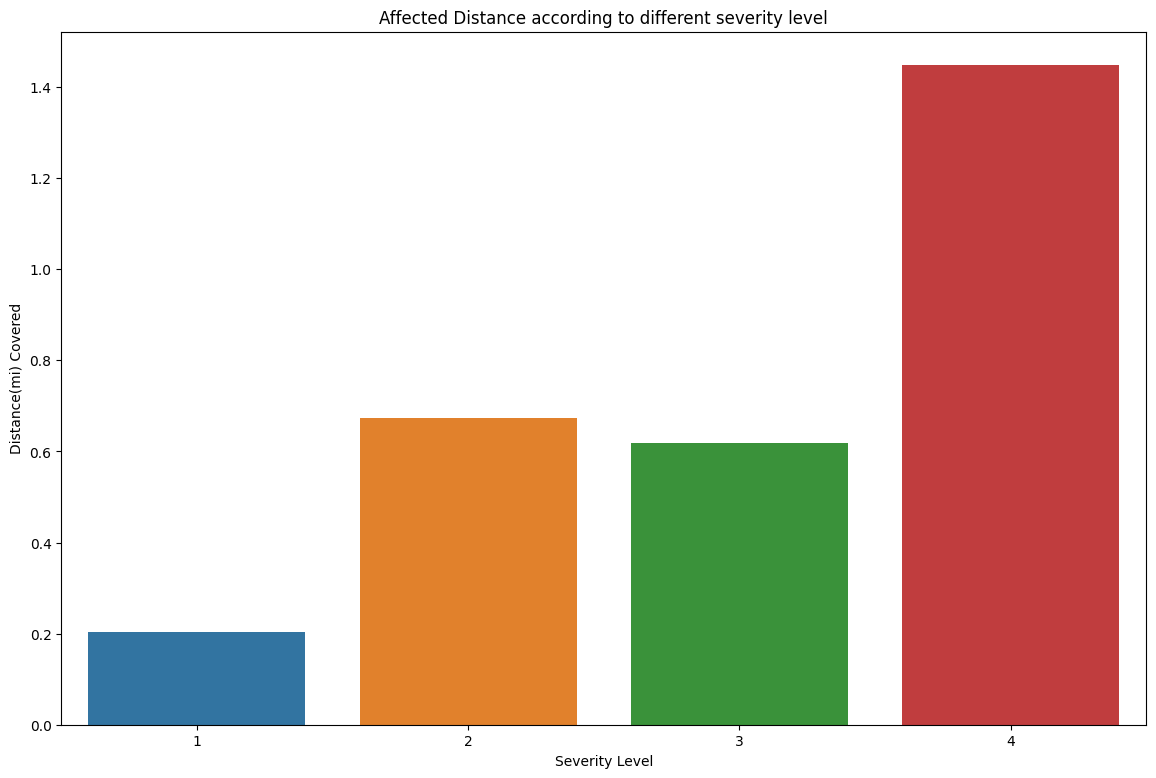

In [26]:
plt.figure(figsize=(14 , 9))
sns.barplot(x = Severity_distance.index, y = Severity_distance.values)
plt.xlabel('Severity Level')
plt.ylabel('Distance(mi) Covered')
plt.title('Affected Distance according to different severity level')
plt.show()

From the above diagram, we can see that Severity with Level 4 has more affect on the road by huge distance than other severity level.

Severity level according to different weather

In [27]:
weather = df['Weather_Condition'].value_counts()[:15]

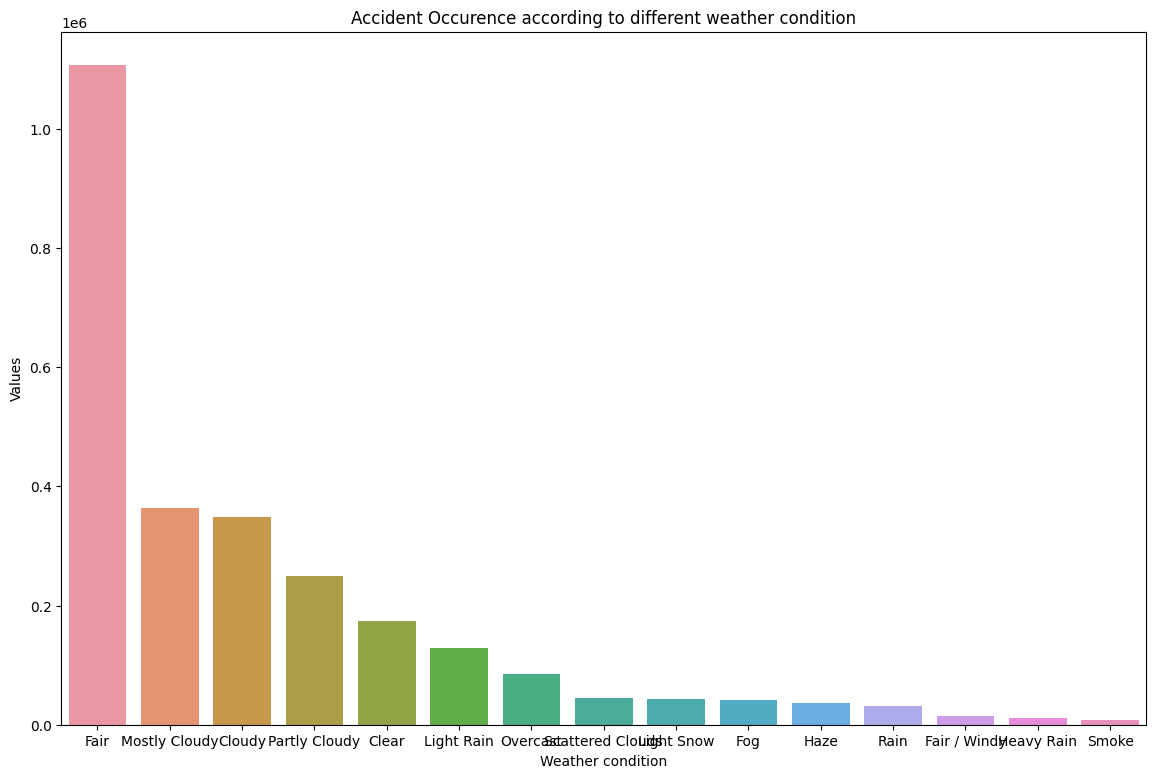

In [28]:
plt.figure(figsize=(14,9))
sns.barplot(x=weather.index, y=weather.values)
plt.xlabel('Weather condition')
plt.ylabel('Values')
plt.title('Accident Occurence according to different weather condition')
plt.show()

From above diagram, we can see that accident occurs most in "Fair" Weather followed by Mostly cloudy and Cloudy weather. Hence, we can conclude that, bad weather is not the main responsible for the accident in US.

## Temperature Analysis at the time of Accident

In [29]:
Temperature = df['Temperature(F)'].value_counts().sort_index(ascending=False).reset_index()

In [30]:
Temperature[:50]

,index,Temperature(F)
0,196.0,3
1,170.6,1
2,168.8,1
3,156.0,1
4,144.0,1
5,136.0,1
6,129.2,1
7,127.4,1
8,120.0,8
9,119.0,5


From above analysis, we can state that at different higher temperature, occurence of accident are higher.

# **Data Preprocessing**

In [31]:
data = df

In [32]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [34]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [35]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


 **Feature Addition**
 
 To prepare the data for the models, we opted to break down the Start_Time characteristic into distinct variables such as year, month, day, weekday, hour, and minute.

In [36]:
# Cast Start_Time to datetime
data["Start_Time"] = pd.to_datetime(data["Start_Time"])

# Extract year, month, weekday and day
data["Year"] = data["Start_Time"].dt.year
data["Month"] = data["Start_Time"].dt.month
data["Weekday"] = data["Start_Time"].dt.weekday
data["Day"] = data["Start_Time"].dt.day

# Extract hour and minute
data["Hour"] = data["Start_Time"].dt.hour
data["Minute"] = data["Start_Time"].dt.minute

data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,0,8,0,37
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,0,8,5,56
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,0,8,6,15
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2,0,8,6,51
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2,0,8,7,53


**Check correlation between features**

In the next block is presented the correlation matrix between all the possible features, in the form of an heatmap.

With that we can observe the correlation between the different features of the dataset, in order to check if some features are highly correlated and remove one of them.

<ipython-input-37-ae9a946dc8dd>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



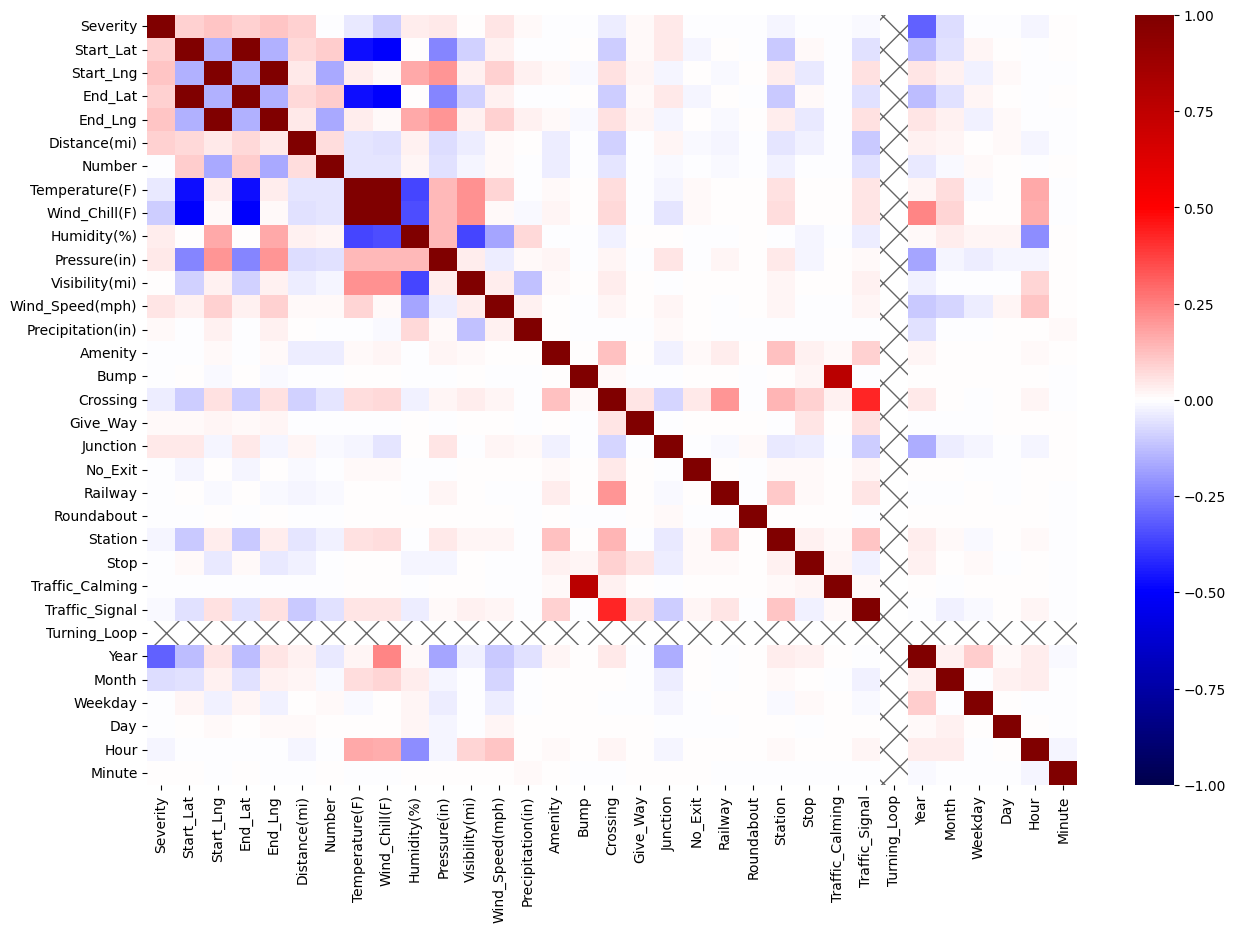

In [37]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

From the matrix we can see that the start and end GPS coordinates of the accidents are highly correlated.

In fact, from the medium distance shown before, the end of the accident is usually close to the start, so we can consider just one of them for the machine learning models.

Moreover, the wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.

We can also see that the presence of a traffic signal is slightly correlated to the severity of an accident meaning that maybe traffic lights can help the traffic flow when an accident occurs.

From the matrix we can also note that we couldn't compute the covariance with Turning_Loop, and that's because it's always False.

**Feature Selection**

Here is the process of feature selection, in order to select the best features from which our models can learn.

From the observations made with the correlation matrix, we are going to drop the following features:

End_Lat and End_Lng
Wind Chill
Moreover, we are going to drop the following features:

- ID: since they don't carry any information for the severity
- Start_Time: because it was decomposed by the time features added before (day, month, weekday)
- End_Time: beause we cannot know in advance when the traffic flow will become regular again
- Description: most description only report the name of the road of the accident, and so we decided to omit this feature for semplicity
- Number, Street, County, State, Zipcode, Country: because we just focus on the City where the accident happened
- Timezone, Airport_Code, Weather_Timestamp: because they are not useful for our task
- Turning_Loop: since it's always False
Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

In [38]:
features_to_drop = ["ID", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number", "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
data = data.drop(features_to_drop, axis=1)
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,3.230,R,Dublin,42.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,8,0,37
1,2,39.865420,-84.062800,0.747,R,Dayton,36.9,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,8,5,56
2,2,39.102660,-84.524680,0.055,R,Cincinnati,36.0,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Night,2016,2,0,8,6,15
3,2,41.062130,-81.537840,0.123,R,Akron,39.0,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,2,0,8,6,51
4,3,39.172393,-84.492792,0.500,R,Cincinnati,37.0,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016,2,0,8,7,53


**Drop Duplicate**

In [39]:
print("Number of rows:", len(data.index))
data.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(data.index))

Number of rows: 2845342
Number of rows after drop of duplicates: 2646365


**Handle erroneous and missing values**

Here we are going to clean the dataset from erroneous or missing values.

Let's start looking to the Side column:

In [40]:
data["Side"].value_counts()

R    2204442
L     441922
N          1
Name: Side, dtype: int64

We can see that there is one record without side, so we can drop it.

In [41]:
data = data[data["Side"] != 'N']
data["Side"].value_counts()

R    2204442
L     441922
Name: Side, dtype: int64

In [42]:
data[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,2590814.00,2580133.00
mean,29.47,9.10
std,1.04,2.74
min,0.00,0.00
25%,29.31,10.00
50%,29.82,10.00
75%,30.01,10.00
max,58.90,140.00


We can see that the minimum value is 0, meaning that some records are missing them and replaced them by putting zeros. For this reason, we are going to drop the records with missing values for these two columns.

In [43]:
data = data[data["Pressure(in)"] != 0]
data = data[data["Visibility(mi)"] != 0]
data[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,2587863.00,2577181.00
mean,29.48,9.11
std,1.04,2.72
min,0.02,0.06
25%,29.31,10.00
50%,29.82,10.00
75%,30.01,10.00
max,58.90,140.00


If we analyze the weather conditions, we can see that there are lots of them, so it's better to reduce the number of unique conditions.

In [44]:
unique_weather = data["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

128
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Volcanic Ash' 'Freezing Rain / Windy' 'Small Hail

To do so, we are going to replace them with a more generic description:

In [45]:
data.loc[data["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
data.loc[data["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
data.loc[data["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
data.loc[data["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
data.loc[data["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
data.loc[data["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
data.loc[data["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
data.loc[data["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
data.loc[data["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
data.loc[data["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
data.loc[data["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(data["Weather_Condition"].unique())


['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


Let's check also the Wind_Direction field:

In [46]:
data["Wind_Direction"].unique()


array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

As we can see, we can group the values like we did with Weather_Condition:

In [47]:
data.loc[data["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
data.loc[data["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
data.loc[data["Wind_Direction"] == "East", "Wind_Direction"] = "E"
data.loc[data["Wind_Direction"] == "North", "Wind_Direction"] = "N"
data.loc[data["Wind_Direction"] == "South", "Wind_Direction"] = "S"
data.loc[data["Wind_Direction"] == "West", "Wind_Direction"] = "W"

data["Wind_Direction"] = data["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

data["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

Next, let's analyze the missing values:

In [48]:
data.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Side                      0
City                    134
Temperature(F)        64919
Humidity(%)           68451
Pressure(in)          55548
Visibility(mi)        66230
Wind_Direction        68729
Wind_Speed(mph)      152343
Precipitation(in)    538376
Weather_Condition     67336
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Civil_Twilight         2652
Year                      0
Month                     0
Weekday                   0
Day                       0
Hour                      0
Minute                    0
dtype: int64

Since a lot of records do not have informations about Precipitation, we are going to drop the feature.

For numerical features we are going to fill the missing features with the mean, while for categorical features like City, Wind_Direction, Weather_Condition and Civil_Twilight, we are going to delete the records with missing informations.

In [49]:
features_to_fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
data[features_to_fill] = data[features_to_fill].fillna(data[features_to_fill].mean())


data.isna().sum()

Severity                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
City                   134
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction       68729
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    67336
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Civil_Twilight        2652
Year                     0
Month                    0
Weekday                  0
Day                      0
Hour                     0
Minute                   0
dtype: int64

In [50]:
data.dropna(inplace=True)

**Check features variance**

In this section we are going to check the variance for each feature in order to remove features with a very low variance beacuse they can't help to discriminate instances.

In [51]:
data.describe().round(2)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
count,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00
mean,2.15,36.29,-97.36,0.70,61.75,64.37,29.48,9.11,7.40,0.01,2019.92,7.44,2.75,16.06,12.78,29.69
std,0.49,5.33,18.28,1.56,18.59,22.84,1.03,2.72,5.45,0.08,1.47,3.64,1.86,8.72,5.84,17.26
min,1.00,24.57,-124.55,0.00,-89.00,1.00,0.02,0.06,0.00,0.00,2016.00,1.00,0.00,1.00,0.00,0.00
25%,2.00,33.47,-118.06,0.05,50.00,48.00,29.32,10.00,3.50,0.00,2019.00,4.00,1.00,9.00,8.00,15.00
50%,2.00,36.08,-93.00,0.25,63.00,67.00,29.82,10.00,7.00,0.00,2021.00,8.00,3.00,16.00,14.00,30.00
75%,2.00,40.17,-80.44,0.77,76.00,83.00,30.01,10.00,10.00,0.01,2021.00,11.00,4.00,23.00,17.00,45.00
max,4.00,49.00,-67.11,155.19,196.00,100.00,58.90,140.00,1087.00,24.00,2021.00,12.00,6.00,31.00,23.00,59.00


Even though Precipitation, Distance(mi) and Pressure have a small variance, there is no need to drop them since they usually have small increments.

**Handling imbalanced data**

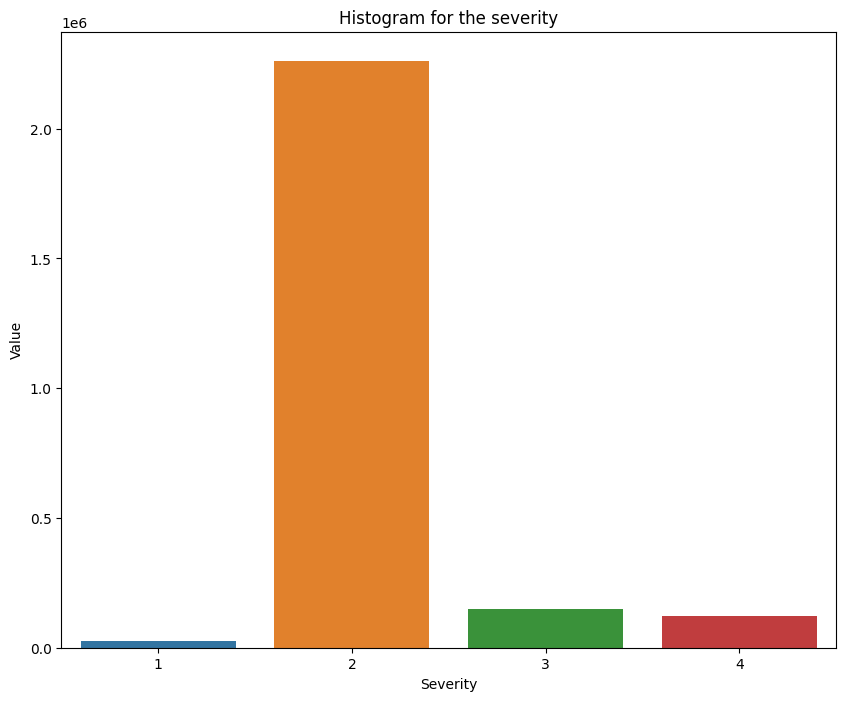

In [52]:
severity_counts = data["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

The severity attribute as we can see from the previous plot is highly unbalanced, the number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher.

So, in order to balance the data, we are going to use several oversampling and undersampling techniques.

In [53]:
# Extract the feature matrix and target variable
X = data.drop(['Severity'], axis=1)
y = data['Severity']

**UnderSampling**

For oversampling we tried two different methods
- Random Oversampling

In [54]:
from imblearn.under_sampling import RandomUnderSampler

In [55]:
# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [56]:
def create_resampled_df(X_resampled, y_resampled, feature_names, target_name):
    # Convert feature matrix to dataframe with column names
    X_resampled_df = pd.DataFrame(X_resampled, columns=feature_names)
    
    # Convert target variable to dataframe with column name
    y_resampled_df = pd.DataFrame(y_resampled, columns=[target_name])
    
    # Concatenate feature and target dataframes
    resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
    
    return resampled_df

In [57]:
# Random Uversampling
rus_df = create_resampled_df(X_rus, y_rus, X.columns, 'Severity')



In [58]:
rus_df2 = create_resampled_df(X_rus, y_rus, X.columns, 'Severity')

In [59]:
rus_df2.to_csv('rus_df2.csv', index=False)

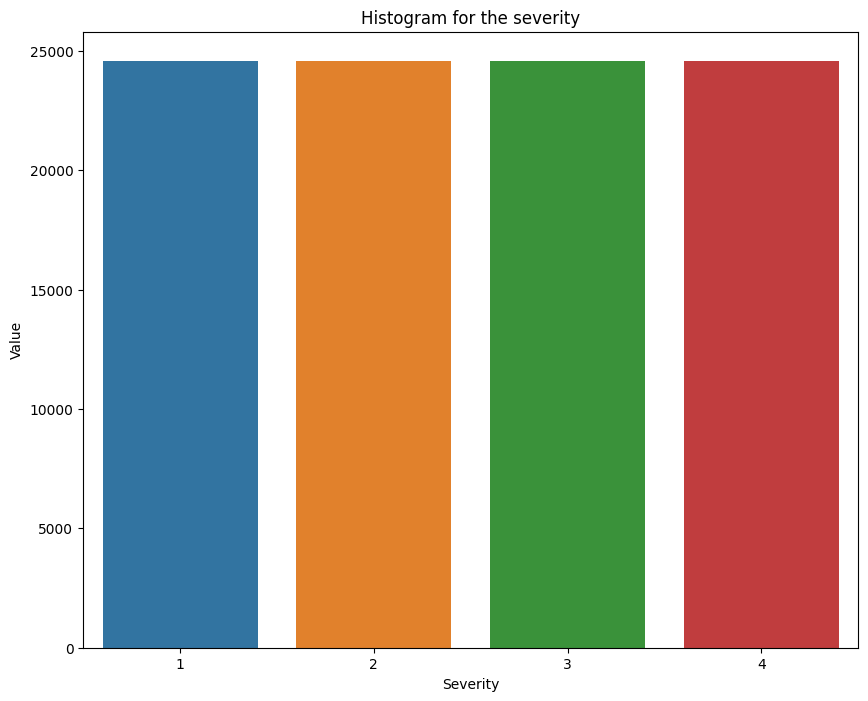

In [60]:
severity_counts = rus_df["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

**Feature Scaling**

In this section we are going to scale and normalize the features.

To improve the performance of our models, we normalized the values of the continuous features.

For undersampling data

In [61]:
scaler2 = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
rus_df[features] = scaler2.fit_transform(rus_df[features])
rus_df.head()

,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute,Severity
0,0.312124,0.237477,0.0,R,Tucson,0.901478,0.204082,0.646797,0.089598,NE,0.019305,0.000000,Cloudy,False,False,True,True,False,False,False,False,False,True,False,True,Day,0.8,0.636364,0.000000,0.066667,0.608696,0.593220,1
1,0.319257,0.237768,0.0,R,Tucson,0.845179,0.173469,0.647687,0.089598,NW,0.019305,0.000000,Clear,False,False,True,False,False,False,False,False,False,False,False,True,Day,0.8,0.727273,0.166667,0.700000,0.695652,0.745763,1
2,0.687999,0.747299,0.0,R,North Ridgeville,0.655172,0.928571,0.823843,0.080584,E,0.009653,0.002002,Thunderstorm,False,False,False,False,False,False,False,False,False,False,False,False,Day,0.8,0.636364,0.000000,0.066667,0.652174,0.711864,1
3,0.370832,0.217182,0.0,R,Phoenix,0.866291,0.163265,0.747331,0.089598,W,0.009653,0.000000,Clear,False,False,True,False,False,False,False,False,False,False,False,True,Day,0.8,0.727273,0.166667,0.700000,0.695652,0.491525,1
4,0.552918,0.041648,0.0,R,Benicia,0.845179,0.204082,0.891459,0.089598,NW,0.017375,0.000000,Clear,False,False,False,False,True,False,False,False,False,False,False,False,Day,0.8,0.636364,0.000000,0.066667,0.565217,0.694915,1


**Feature Encoding**

In this section we are going to encode the categorical features.

In [62]:
categorical_features = set(["Side", "City", "Wind_Direction", "Weather_Condition", "Civil_Twilight"])

for cat in categorical_features:
    rus_df[cat] = rus_df[cat].astype("category")

rus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98312 entries, 0 to 98311
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Start_Lat          98312 non-null  float64 
 1   Start_Lng          98312 non-null  float64 
 2   Distance(mi)       98312 non-null  float64 
 3   Side               98312 non-null  category
 4   City               98312 non-null  category
 5   Temperature(F)     98312 non-null  float64 
 6   Humidity(%)        98312 non-null  float64 
 7   Pressure(in)       98312 non-null  float64 
 8   Visibility(mi)     98312 non-null  float64 
 9   Wind_Direction     98312 non-null  category
 10  Wind_Speed(mph)    98312 non-null  float64 
 11  Precipitation(in)  98312 non-null  float64 
 12  Weather_Condition  98312 non-null  category
 13  Amenity            98312 non-null  bool    
 14  Bump               98312 non-null  bool    
 15  Crossing           98312 non-null  bool    
 16  Give

In [64]:
print("Unique classes for each categorical feature:")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(rus_df[cat].unique()))

Unique classes for each categorical feature:
Side            	 2
Wind_Direction  	 10
Civil_Twilight  	 2
City            	 6811
Weather_Condition 	 10


Let's first encode the boolean values in a numerical form.

In [65]:
rus_df = rus_df.replace([True, False], [1, 0])

rus_df.head()

,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute,Severity
0,0.312124,0.237477,0.0,R,Tucson,0.901478,0.204082,0.646797,0.089598,NE,0.019305,0.000000,Cloudy,0,0,1,1,0,0,0,0,0,1,0,1,Day,0.8,0.636364,0.000000,0.066667,0.608696,0.593220,1
1,0.319257,0.237768,0.0,R,Tucson,0.845179,0.173469,0.647687,0.089598,NW,0.019305,0.000000,Clear,0,0,1,0,0,0,0,0,0,0,0,1,Day,0.8,0.727273,0.166667,0.700000,0.695652,0.745763,1
2,0.687999,0.747299,0.0,R,North Ridgeville,0.655172,0.928571,0.823843,0.080584,E,0.009653,0.002002,Thunderstorm,0,0,0,0,0,0,0,0,0,0,0,0,Day,0.8,0.636364,0.000000,0.066667,0.652174,0.711864,1
3,0.370832,0.217182,0.0,R,Phoenix,0.866291,0.163265,0.747331,0.089598,W,0.009653,0.000000,Clear,0,0,1,0,0,0,0,0,0,0,0,1,Day,0.8,0.727273,0.166667,0.700000,0.695652,0.491525,1
4,0.552918,0.041648,0.0,R,Benicia,0.845179,0.204082,0.891459,0.089598,NW,0.017375,0.000000,Clear,0,0,0,0,1,0,0,0,0,0,0,0,Day,0.8,0.636364,0.000000,0.066667,0.565217,0.694915,1


Now we can encode the categorical features using the method get_dummies() which converts the features with the one-hot encoding.

In [66]:
# Remove city because it will be encoded later
onehot_cols = categorical_features - set(["City"])

rus_df = pd.get_dummies(rus_df, columns=onehot_cols, drop_first=True)

rus_df.head()

<ipython-input-66-5cdc7a69af61>:4: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Severity,Side_R,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Civil_Twilight_Night
0,0.312124,0.237477,0.0,Tucson,0.901478,0.204082,0.646797,0.089598,0.019305,0.000000,0,0,1,1,0,0,0,0,0,1,0,1,0.8,0.636364,0.000000,0.066667,0.608696,0.593220,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.319257,0.237768,0.0,Tucson,0.845179,0.173469,0.647687,0.089598,0.019305,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.745763,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.687999,0.747299,0.0,North Ridgeville,0.655172,0.928571,0.823843,0.080584,0.009653,0.002002,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.652174,0.711864,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.370832,0.217182,0.0,Phoenix,0.866291,0.163265,0.747331,0.089598,0.009653,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.491525,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.552918,0.041648,0.0,Benicia,0.845179,0.204082,0.891459,0.089598,0.017375,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.565217,0.694915,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Now, remains only to encode the City feature. In order to, reduce the usage of memory and the number of features we used the BinaryEncoder included in the library category_encoders.

In [67]:
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(rus_df["City"])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98307,1,0,0,0,1,0,1,1,0,1,1,1,0
98308,0,0,0,1,0,0,0,1,0,0,0,0,0
98309,0,0,0,0,1,1,0,1,1,1,1,0,1
98310,0,0,1,0,1,1,1,0,0,0,0,0,1


In [68]:
rus_df = pd.concat([rus_df, city_binary_enc], axis=1).drop("City", axis=1)

rus_df.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Severity,Side_R,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Civil_Twilight_Night,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
0,0.312124,0.237477,0.0,0.901478,0.204082,0.646797,0.089598,0.019305,0.000000,0,0,1,1,0,0,0,0,0,1,0,1,0.8,0.636364,0.000000,0.066667,0.608696,0.593220,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.319257,0.237768,0.0,0.845179,0.173469,0.647687,0.089598,0.019305,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.745763,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.687999,0.747299,0.0,0.655172,0.928571,0.823843,0.080584,0.009653,0.002002,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.652174,0.711864,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.370832,0.217182,0.0,0.866291,0.163265,0.747331,0.089598,0.009653,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.491525,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.552918,0.041648,0.0,0.845179,0.204082,0.891459,0.089598,0.017375,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.565217,0.694915,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
rus_df


,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Severity,Side_R,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Civil_Twilight_Night,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
0,0.312124,0.237477,0.000000,0.901478,0.204082,0.646797,0.089598,0.019305,0.000000,0,0,1,1,0,0,0,0,0,1,0,1,0.8,0.636364,0.000000,0.066667,0.608696,0.593220,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.319257,0.237768,0.000000,0.845179,0.173469,0.647687,0.089598,0.019305,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.745763,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.687999,0.747299,0.000000,0.655172,0.928571,0.823843,0.080584,0.009653,0.002002,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.652174,0.711864,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.370832,0.217182,0.000000,0.866291,0.163265,0.747331,0.089598,0.009653,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.491525,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.552918,0.041648,0.000000,0.845179,0.204082,0.891459,0.089598,0.017375,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.565217,0.694915,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98307,0.613339,0.866097,0.007372,0.696692,0.653061,0.903915,0.089598,0.013320,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.909091,0.666667,0.066667,0.521739,0.559322,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,1,1,0
98308,0.918653,0.027710,0.001856,0.591837,0.714286,0.887900,0.089598,0.023166,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.545455,0.000000,0.000000,0.913043,0.932203,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
98309,0.645169,0.722702,0.023829,0.446165,0.724490,0.920819,0.089598,0.006757,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0.090909,1.000000,0.566667,0.782609,0.627119,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,1
98310,0.822836,0.983295,0.016243,0.613652,0.510204,0.930605,0.089598,0.024517,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.727273,0.333333,0.900000,0.695652,0.474576,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1


In [70]:
rus_df.isna().sum()

Start_Lat         0
Start_Lng         0
Distance(mi)      0
Temperature(F)    0
Humidity(%)       0
                 ..
City_8            0
City_9            0
City_10           0
City_11           0
City_12           0
Length: 61, dtype: int64

In [71]:
rus_df.dropna(axis=0, inplace=True)

In [72]:
rus_df

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Severity,Side_R,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Civil_Twilight_Night,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
0,0.312124,0.237477,0.000000,0.901478,0.204082,0.646797,0.089598,0.019305,0.000000,0,0,1,1,0,0,0,0,0,1,0,1,0.8,0.636364,0.000000,0.066667,0.608696,0.593220,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.319257,0.237768,0.000000,0.845179,0.173469,0.647687,0.089598,0.019305,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.745763,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.687999,0.747299,0.000000,0.655172,0.928571,0.823843,0.080584,0.009653,0.002002,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.652174,0.711864,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.370832,0.217182,0.000000,0.866291,0.163265,0.747331,0.089598,0.009653,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.491525,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.552918,0.041648,0.000000,0.845179,0.204082,0.891459,0.089598,0.017375,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.565217,0.694915,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98307,0.613339,0.866097,0.007372,0.696692,0.653061,0.903915,0.089598,0.013320,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.909091,0.666667,0.066667,0.521739,0.559322,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,1,1,0
98308,0.918653,0.027710,0.001856,0.591837,0.714286,0.887900,0.089598,0.023166,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.545455,0.000000,0.000000,0.913043,0.932203,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
98309,0.645169,0.722702,0.023829,0.446165,0.724490,0.920819,0.089598,0.006757,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0.090909,1.000000,0.566667,0.782609,0.627119,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,1
98310,0.822836,0.983295,0.016243,0.613652,0.510204,0.930605,0.089598,0.024517,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.727273,0.333333,0.900000,0.695652,0.474576,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1


In [73]:
rus_df['Severity'] = rus_df['Severity'].replace({1: 0, 2: 1, 3: 2, 4: 3})

## **Model Training**

In [74]:
rus_df

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Severity,Side_R,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Civil_Twilight_Night,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
0,0.312124,0.237477,0.000000,0.901478,0.204082,0.646797,0.089598,0.019305,0.000000,0,0,1,1,0,0,0,0,0,1,0,1,0.8,0.636364,0.000000,0.066667,0.608696,0.593220,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.319257,0.237768,0.000000,0.845179,0.173469,0.647687,0.089598,0.019305,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.745763,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.687999,0.747299,0.000000,0.655172,0.928571,0.823843,0.080584,0.009653,0.002002,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.652174,0.711864,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.370832,0.217182,0.000000,0.866291,0.163265,0.747331,0.089598,0.009653,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0.8,0.727273,0.166667,0.700000,0.695652,0.491525,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.552918,0.041648,0.000000,0.845179,0.204082,0.891459,0.089598,0.017375,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0.8,0.636364,0.000000,0.066667,0.565217,0.694915,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98307,0.613339,0.866097,0.007372,0.696692,0.653061,0.903915,0.089598,0.013320,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.909091,0.666667,0.066667,0.521739,0.559322,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,1,1,0
98308,0.918653,0.027710,0.001856,0.591837,0.714286,0.887900,0.089598,0.023166,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.545455,0.000000,0.000000,0.913043,0.932203,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
98309,0.645169,0.722702,0.023829,0.446165,0.724490,0.920819,0.089598,0.006757,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0.090909,1.000000,0.566667,0.782609,0.627119,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,1
98310,0.822836,0.983295,0.016243,0.613652,0.510204,0.930605,0.089598,0.024517,0.000714,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.727273,0.333333,0.900000,0.695652,0.474576,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1


In [75]:
X = rus_df.drop(['Severity'], axis=1)
y = rus_df['Severity']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
def parameter_models(X_train,X_test,y_train,y_test, class_names):

  #For Logistic Regression

  model_lr = LogisticRegression(max_iter=10000)
  model_lr.fit(X_train,y_train)
  y_pred_lr = model_lr.predict(X_test)
  y_pred_train_lr = model_lr.predict(X_train)
  acc_lr = accuracy_score(y_test,y_pred_lr)
  pre_lr = precision_score(y_test,y_pred_lr,average = 'weighted')
  rec_lr = recall_score(y_test,y_pred_lr,average = 'weighted')
  f1_lr = f1_score(y_test,y_pred_lr,average = 'weighted')
  f1_train_lr = f1_score(y_train,y_pred_train_lr,average = 'weighted')
  print('Confusion Matrix for Logistic Regression:')
  ConfusionMatrixDisplay.from_estimator(model_lr, X_train, y_train, display_labels=class_names)
  
  # For Decision Tree

  clf = DecisionTreeClassifier()
  clf.fit(X_train,y_train)
  y_pred_dt = clf.predict(X_test)
  y_pred_train_dt = clf.predict(X_train)
  acc_dt = accuracy_score(y_test,y_pred_dt)
  pre_dt = precision_score(y_test,y_pred_dt,average = 'weighted')
  rec_dt = recall_score(y_test,y_pred_dt,average = 'weighted')
  f1_dt = f1_score(y_test,y_pred_dt,average = 'weighted')
  f1_train_dt = f1_score(y_train,y_pred_train_dt,average = 'weighted')
  print('Confusion Matrix for Decision Tree:')
  ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=class_names)
  
  # For Random Forest

  forest = RandomForestClassifier(n_estimators=100)
  forest.fit(X_train,y_train)
  y_pred_rf = forest.predict(X_test)
  y_pred_train_rf = forest.predict(X_train)
  acc_rf = accuracy_score(y_test,y_pred_rf)
  pre_rf = precision_score(y_test,y_pred_rf,average = 'weighted')
  rec_rf = recall_score(y_test,y_pred_rf,average = 'weighted')
  f1_rf = f1_score(y_test,y_pred_rf,average = 'weighted')
  f1_train_rf = f1_score(y_train,y_pred_train_rf,average = 'weighted')
  print('Confusion Matrix for Random Forest:')
  ConfusionMatrixDisplay.from_estimator(forest, X_train, y_train, display_labels=class_names)
  
  # For Gradinent Boosting

  grad = GradientBoostingClassifier()
  grad.fit(X_train,y_train)
  y_pred_gb = grad.predict(X_test)
  y_pred_train_gb = grad.predict(X_train)
  acc_gb = accuracy_score(y_test,y_pred_gb)
  pre_gb = precision_score(y_test,y_pred_gb,average = 'weighted')
  rec_gb = recall_score(y_test,y_pred_gb,average = 'weighted')
  f1_gb = f1_score(y_test,y_pred_gb,average = 'weighted')
  f1_train_gb = f1_score(y_train,y_pred_train_gb,average = 'weighted')
  print('Confusion Matrix for Gradient Boosting:')
  ConfusionMatrixDisplay.from_estimator(grad, X_train, y_train, display_labels=class_names)

  # For Ada Boost

  ada = AdaBoostClassifier()
  ada.fit(X_train,y_train)
  y_pred_ab = ada.predict(X_test)
  y_pred_train_ab = ada.predict(X_train)
  acc_ab = accuracy_score(y_test,y_pred_ab)
  pre_ab = precision_score(y_test,y_pred_ab,average = 'weighted')
  rec_ab = recall_score(y_test,y_pred_ab,average = 'weighted')
  f1_ab = f1_score(y_test,y_pred_ab,average = 'weighted')
  f1_train_ab = f1_score(y_train,y_pred_train_ab,average = 'weighted')
  print('Confusion Matrix for Ada Boost:')
  ConfusionMatrixDisplay.from_estimator(ada, X_train, y_train, display_labels=class_names)
  
  # For XG Boost
  xgb = XGBClassifier()
  xgb.fit(X_train,y_train)
  y_pred_xg = xgb.predict(X_test)
  y_pred_train_xg = xgb.predict(X_train)
  acc_xg = accuracy_score(y_test,y_pred_xg)
  pre_xg = precision_score(y_test,y_pred_xg,average = 'weighted')
  rec_xg = recall_score(y_test,y_pred_xg,average = 'weighted')
  f1_xg = f1_score(y_test,y_pred_xg,average = 'weighted')
  f1_train_xg = f1_score(y_train,y_pred_train_xg,average = 'weighted')
  print('Confusion Matrix for XG Boost:')
  ConfusionMatrixDisplay.from_estimator(xgb, X_train, y_train, display_labels=class_names)
  
  data = {'Model Name':['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','Ada Boost','XG Boost'],
         'Accuracy':[acc_lr,acc_dt,acc_rf,acc_gb,acc_ab,acc_xg],
         'Precision':[pre_lr,pre_dt,pre_rf,pre_gb,pre_ab,pre_xg],
         'Recall':[rec_lr,rec_dt,rec_rf,rec_gb,rec_ab,rec_xg],
         'Test F1 Score':[f1_lr,f1_dt,f1_rf,f1_gb,f1_ab,f1_xg],
         'Train F1 Score':[f1_train_lr,f1_train_dt,f1_train_rf,f1_train_gb,f1_train_ab,f1_train_xg]}

  df = pd.DataFrame(data)

  return df

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


In [79]:
severity_levels = rus_df['Severity'].unique()
class_names = []
for level in severity_levels:
    class_names.append(f"Severity Level {level}")


In [ ]:
output_df = parameter_models(X_train, X_test, y_train, y_test, class_names)

In [ ]:
output_df

From above, we can see that XG Boost have highest accuracy among all.

In [80]:
def getTop10Features(X_train,y_train):
    corr = X_train.corrwith(y_train,axis=0)
    top10_features = np.abs(corr).sort_values(ascending=False).iloc[0:10].index
    return top10_features

In [81]:
top10 = getTop10Features(X_train, y_train)

In [82]:
top10

Index(['Year', 'City_0', 'Traffic_Signal', 'Crossing', 'Start_Lng',
       'Humidity(%)', 'Temperature(F)', 'City_2', 'City_3', 'City_1'],
      dtype='object')

**Hyperparameter Tuning**

For hyperparameter tuning, we did it manually. After several manual process, the parameter we got was

- learning_rate: 0.1
- max_depth: 6
- min_child_weight: 3
- subsample: 0.8
- colsample_bytree: 0.8
- n_estimators: 500

In [83]:
xgb2 = XGBClassifier(learning_rate=0.1,
                    max_depth=6,
                    min_child_weight=3,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    n_estimators=500,
                    random_state=42)

Accuracy:  0.79321568428012
Precision:  0.7932480688674913
Recall:  0.79321568428012
F1 Score:  0.7912866916590376
Train F1 Score:  0.8797133521115443


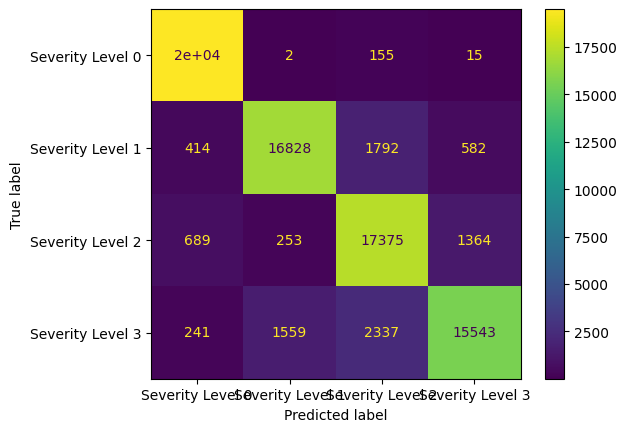

In [84]:
# Fit the classifier on the training data
xgb2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb2.predict(X_test)

# Make predictions on the training data
y_pred_train_xgb = xgb2.predict(X_train)

# Calculate evaluation metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
pre_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
rec_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
f1_train_xgb = f1_score(y_train, y_pred_train_xgb, average='weighted')

# Print evaluation metrics and confusion matrix
print('Accuracy: ', acc_xgb)
print('Precision: ', pre_xgb)
print('Recall: ', rec_xgb)
print('F1 Score: ', f1_xgb)
print('Train F1 Score: ', f1_train_xgb)
ConfusionMatrixDisplay.from_estimator(xgb2, X_train, y_train, display_labels=class_names)

### **Saving the model**

In [85]:
import pickle

# save the model to disk
filename = 'xgboost_model.sav'
pickle.dump(xgb2, open(filename, 'wb'))

In [86]:
importances = xgb2.feature_importances_
feature_names = X_train.columns.tolist()

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(feature_names, importances))

# Sort the features by their importance, in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most important features
for feature, importance in sorted_importances[:30]:
    print("{}: {:.3f}".format(feature, importance))

Year: 0.197
City_0: 0.161
Distance(mi): 0.060
City_2: 0.058
City_1: 0.049
Side_R: 0.041
Month: 0.040
Precipitation(in): 0.034
City_3: 0.028
Crossing: 0.019
Traffic_Signal: 0.019
Start_Lng: 0.018
Civil_Twilight_Night: 0.017
Start_Lat: 0.013
Junction: 0.011
City_4: 0.010
Stop: 0.010
Hour: 0.008
Pressure(in): 0.008
Weather_Condition_Smoke: 0.007
Weekday: 0.007
City_7: 0.006
Station: 0.006
City_5: 0.006
Weather_Condition_Rain: 0.006
Wind_Direction_Variable: 0.006
Amenity: 0.006
Wind_Direction_N: 0.006
Weather_Condition_Windy: 0.006
Wind_Direction_W: 0.006


In [87]:
rus_df2.columns

Index(['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Year', 'Month',
       'Weekday', 'Day', 'Hour', 'Minute', 'Severity'],
      dtype='object')

**Assigning new df with most important features obtained from above**

Loading the saved rus_df.csv to have non feature engineered data

In [ ]:
#final_df = rus_df2.loc[:, ['City', 'Distance(mi)', 'Month', 'Precipitation(in)', 'Crossing', 'Traffic_Signal', 'Start_Lng', 'Start_Lat', 'Junction', 'Stop', 'Hour', 'Pressure(in)','Weekday', 'Station', 'Weather_Condition', 'Amenity', 'Humidity(%)', 'Severity']]

In [103]:
rus_df2 = pd.read_csv('rus_df2.csv')

In [107]:
final_df = rus_df2.loc[:,['City', 'Distance(mi)', 'Month', 'Precipitation(in)', 'Crossing', 'Traffic_Signal', 'Start_Lng', 'Start_Lat', 'Junction', 'Stop', 'Hour', 'Pressure(in)','Weekday', 'Station', 'Weather_Condition', 'Amenity', 'Humidity(%)', 'Severity']
]

In [108]:
final_df

,City,Distance(mi),Month,Precipitation(in),Crossing,Traffic_Signal,Start_Lng,Start_Lat,Junction,Stop,Hour,Pressure(in),Weekday,Station,Weather_Condition,Amenity,Humidity(%),Severity
0,Tucson,0.000,8,0.000000,True,True,-110.980500,32.206760,False,True,14,27.15,0,False,Cloudy,False,22.0,1
1,Tucson,0.000,9,0.000000,True,True,-110.963920,32.380840,False,False,16,27.16,1,False,Clear,False,19.0,1
2,North Ridgeville,0.000,8,0.020000,False,False,-81.994100,41.379780,False,False,15,29.14,0,False,Thunderstorm,False,93.0,1
3,Phoenix,0.000,9,0.000000,True,True,-112.134360,33.639500,False,False,16,28.28,1,False,Clear,False,18.0,1
4,Benicia,0.000,8,0.000000,False,False,-122.114500,38.083200,True,False,13,29.90,0,False,Clear,False,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98307,Elmer,0.826,11,0.007133,False,False,-75.239729,39.557760,False,False,12,30.04,4,False,Clear,False,66.0,4
98308,Olympia,0.208,7,0.000000,False,False,-122.906930,47.008780,False,False,21,29.86,0,False,Cloudy,False,72.0,4
98309,Marysville,2.670,2,0.007133,False,False,-83.392567,40.334555,False,False,18,30.23,6,False,Clear,False,73.0,4
98310,Dedham,1.820,9,0.007133,False,False,-68.576346,44.670417,False,False,16,30.34,2,False,Cloudy,False,52.0,4


In [110]:
features = ['Distance(mi)','Humidity(%)','Pressure(in)','Precipitation(in)','Start_Lng','Start_Lat', 'Month','Weekday','Hour']
final_df[features] = scaler2.fit_transform(final_df[features])

In [111]:
final_df.head()

,City,Distance(mi),Month,Precipitation(in),Crossing,Traffic_Signal,Start_Lng,Start_Lat,Junction,Stop,Hour,Pressure(in),Weekday,Station,Weather_Condition,Amenity,Humidity(%),Severity
0,Tucson,0.0,0.636364,0.000000,True,True,0.237477,0.312124,False,True,0.608696,0.646797,0.000000,False,Cloudy,False,0.204082,1
1,Tucson,0.0,0.727273,0.000000,True,True,0.237768,0.319257,False,False,0.695652,0.647687,0.166667,False,Clear,False,0.173469,1
2,North Ridgeville,0.0,0.636364,0.002002,False,False,0.747299,0.687999,False,False,0.652174,0.823843,0.000000,False,Thunderstorm,False,0.928571,1
3,Phoenix,0.0,0.727273,0.000000,True,True,0.217182,0.370832,False,False,0.695652,0.747331,0.166667,False,Clear,False,0.163265,1
4,Benicia,0.0,0.636364,0.000000,False,False,0.041648,0.552918,True,False,0.565217,0.891459,0.000000,False,Clear,False,0.204082,1


In [141]:
rus_df2['City'].nunique()


6811

In [113]:
categorical_features = set(["City", "Weather_Condition"])
for cat in categorical_features:
    final_df[cat] = final_df[cat].astype("category")

In [115]:
final_df = final_df.replace([True, False], [1, 0])

In [116]:
onehot_cols = categorical_features - set(["City"])

final_df = pd.get_dummies(final_df, columns=onehot_cols, drop_first=True)

<ipython-input-116-93927546657f>:3: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



In [117]:
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(final_df["City"])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98307,1,0,0,0,1,0,1,1,0,1,1,1,0
98308,0,0,0,1,0,0,0,1,0,0,0,0,0
98309,0,0,0,0,1,1,0,1,1,1,1,0,1
98310,0,0,1,0,1,1,1,0,0,0,0,0,1


In [144]:
tucson_encoded = binary_encoder.transform(pd.DataFrame({'City': ['Tucson']})).iloc[0]
tucson_encoded

City_0     0
City_1     0
City_2     0
City_3     0
City_4     0
City_5     0
City_6     0
City_7     0
City_8     0
City_9     0
City_10    0
City_11    0
City_12    1
Name: 0, dtype: int64

In [118]:
final_df = pd.concat([final_df, city_binary_enc], axis=1).drop("City", axis=1)

final_df.head()

,Distance(mi),Month,Precipitation(in),Crossing,Traffic_Signal,Start_Lng,Start_Lat,Junction,Stop,Hour,Pressure(in),Weekday,Station,Amenity,Humidity(%),Severity,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
0,0.0,0.636364,0.000000,1,1,0.237477,0.312124,0,1,0.608696,0.646797,0.000000,0,0,0.204082,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0.727273,0.000000,1,1,0.237768,0.319257,0,0,0.695652,0.647687,0.166667,0,0,0.173469,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.0,0.636364,0.002002,0,0,0.747299,0.687999,0,0,0.652174,0.823843,0.000000,0,0,0.928571,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.0,0.727273,0.000000,1,1,0.217182,0.370832,0,0,0.695652,0.747331,0.166667,0,0,0.163265,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.0,0.636364,0.000000,0,0,0.041648,0.552918,1,0,0.565217,0.891459,0.000000,0,0,0.204082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [150]:
# get the encoded value for the weather condition "Rainy"
rainy_encoded = final_df.loc[[1], 'Weather_Condition_Cloudy']
rainy_encoded

1    0
Name: Weather_Condition_Cloudy, dtype: uint8

In [119]:
final_df.isna().sum()

Distance(mi)                      0
Month                             0
Precipitation(in)                 0
Crossing                          0
Traffic_Signal                    0
Start_Lng                         0
Start_Lat                         0
Junction                          0
Stop                              0
Hour                              0
Pressure(in)                      0
Weekday                           0
Station                           0
Amenity                           0
Humidity(%)                       0
Severity                          0
Weather_Condition_Cloudy          0
Weather_Condition_Fog             0
Weather_Condition_Hail            0
Weather_Condition_Rain            0
Weather_Condition_Sand            0
Weather_Condition_Smoke           0
Weather_Condition_Snow            0
Weather_Condition_Thunderstorm    0
Weather_Condition_Windy           0
City_0                            0
City_1                            0
City_2                      

In [151]:
final_df.shape

(98312, 38)

In [120]:
final_df['Severity'] = final_df['Severity'].replace({1: 0, 2: 1, 3: 2, 4: 3})

In [121]:
y1 = final_df['Severity']
X1 = final_df.drop(['Severity'], axis=1)

In [122]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [123]:
xgb3 = XGBClassifier(learning_rate=0.1,
                    max_depth=6,
                    min_child_weight=3,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    n_estimators=500,
                    random_state=42)

Accuracy:  0.7592941056807201
Precision:  0.7563218923779534
Recall:  0.7592941056807201
F1 Score:  0.7572967446447588
Train F1 Score:  0.8382253747669544


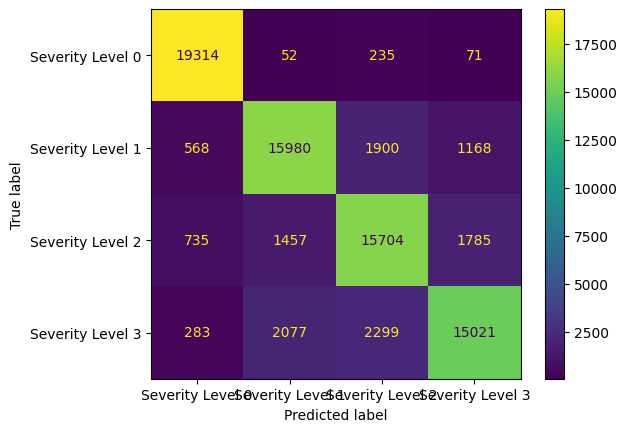

In [124]:
# Fit the classifier on the training data
xgb3.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred_xgb = xgb3.predict(X_test1)

# Make predictions on the training data
y_pred_train_xgb = xgb3.predict(X_train1)

# Calculate evaluation metrics
acc_xgb = accuracy_score(y_test1, y_pred_xgb)
pre_xgb = precision_score(y_test1, y_pred_xgb, average='weighted')
rec_xgb = recall_score(y_test1, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test1, y_pred_xgb, average='weighted')
f1_train_xgb = f1_score(y_train1, y_pred_train_xgb, average='weighted')

# Print evaluation metrics and confusion matrix
print('Accuracy: ', acc_xgb)
print('Precision: ', pre_xgb)
print('Recall: ', rec_xgb)
print('F1 Score: ', f1_xgb)
print('Train F1 Score: ', f1_train_xgb)
ConfusionMatrixDisplay.from_estimator(xgb3, X_train1, y_train1, display_labels=class_names)

In [152]:
import pickle

# save the model to disk
filename = 'xgboost_final_model.sav'
pickle.dump(xgb3, open(filename, 'wb'))

In [153]:
# load the saved model
filename = 'xgboost_final_model.sav'
model = pickle.load(open(filename, 'rb'))

In [96]:
# def predict(df):
#   rus_df2 = pd.read_csv(rus)


#   from sklearn.preprocessing import MinMaxScaler
#   scaler = MinMaxScaler()
#   features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
#   rus_df2[features] = scaler2.fit_transform(rus_df2[features])

#   categorical_features = set(["City", "Weather_Condition"])
#   for cat in categorical_features:
#     rus_df2[cat] = rus_df2[cat].astype("category")

#   rus_df2 = rus_df2.replace([True, False], [1, 0])

#   onehot_cols = categorical_features - set(["City"])

#   rus_df2 = pd.get_dummies(rus_df2, columns=onehot_cols, drop_first=True)

#   binary_encoder = ce.binary.BinaryEncoder()

#   city_binary_enc = binary_encoder.fit_transform(rus_df2["City"])

#   severity = model.predict(rus_df2)
#   return severity

In [205]:
data_dict = [{'City':'Phoenix',
              'Distance(mi)':2.4,
              'Month':8,
              'Precipitation(in)':0,
              'Crossing':True,
              'Traffic_Signal':False,
              'Start_Lng':-110.98,
              'Start_Lat':32.20,
              'Junction':True,
              'Stop': True,
              'Hour':20,
              'Pressure(in)': 27.15,
              'Weekday': 0,
              'Station': False,
              'Weather_Condition':'Hail',
              'Amenity': False,
              'Humidity(%)':22}]

df = pd.DataFrame(data_dict)

# List of weather conditions
weather_conditions = ['Cloudy', 'Fog', 'Hail', 'Rain', 'Sand', 'Smoke', 'Snow', 'Thunderstorm', 'Windy']

# Append columns with initial value of 0
for condition in weather_conditions:
    df[f'Weather_Condition_{condition}'] = 0

df.head()

cities = ['City_0', 'City_1', 'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8', 'City_9', 'City_10', 'City_11', 'City_12']

# Append the city names as columns with initial value 0
for city in cities:
    df[city] = 0

df
#['City', 'Distance(mi)', 'Month', 'Precipitation(in)', 'Crossing', 'Traffic_Signal', 'Start_Lng', 'Start_Lat', 'Junction', 'Stop', 'Hour', 'Pressure(in)','Weekday', 'Station', 'Weather_Condition', 'Amenity', 'Humidity(%)']

,City,Distance(mi),Month,Precipitation(in),Crossing,Traffic_Signal,Start_Lng,Start_Lat,Junction,Stop,Hour,Pressure(in),Weekday,Station,Weather_Condition,Amenity,Humidity(%),Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Windy,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
0,Phoenix,2.4,8,0,True,False,-110.98,32.2,True,True,20,27.15,0,False,Hail,False,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [206]:
rus_dfp = pd.read_csv('rus_df2.csv')

rus_dfp1 =  rus_dfp.loc[:,['City', 'Distance(mi)', 'Month', 'Precipitation(in)', 'Crossing', 'Traffic_Signal', 'Start_Lng', 'Start_Lat', 'Junction', 'Stop', 'Hour', 'Pressure(in)','Weekday', 'Station', 'Weather_Condition', 'Amenity', 'Humidity(%)', 'Severity']
]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['Distance(mi)','Humidity(%)','Pressure(in)','Precipitation(in)','Start_Lng','Start_Lat', 'Month','Weekday','Hour']
rus_dfp1[features] = scaler2.fit_transform(rus_dfp1[features])

categorical_features = set(["City", "Weather_Condition"])
for cat in categorical_features:
  rus_dfp1[cat] = rus_dfp1[cat].astype("category")

rus_dfp1 = rus_dfp1.replace([True, False], [1, 0])



onehot_cols = categorical_features - set(["City"])
rus_dfp1 = pd.get_dummies(rus_dfp1, columns=onehot_cols, drop_first=True)
input_weather = df.loc[0, 'Weather_Condition']
weather_col = 'Weather_Condition_' + input_weather
weather_name = 'Weather_Condition_' + input_weather
weather_encoded = rus_dfp1.loc[:, weather_col]
df[weather_name] = weather_encoded
df = df.drop('Weather_Condition', axis=1)


binary_encoder = ce.binary.BinaryEncoder()
city_binary_enc = binary_encoder.fit_transform(rus_df2["City"])
input_city = df.loc[0, 'City']
# Find the row in the DataFrame containing the desired city name
city_row = rus_dfp1.loc[rus_dfp1['City'] == input_city].iloc[0]

# Encode the city name using the binary encoder
city_encoded = binary_encoder.transform(pd.DataFrame({'City': [city_row['City']]})).iloc[0]

df.loc[0, 'City_0':'City_12'] = city_encoded
df = df.drop('City', axis=1)



severity = model.predict(df)

<ipython-input-206-11e2b19e1c04>:20: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



In [207]:
severity

array([3])

In [187]:
print(severity)


[2]
